Hola **Macarena**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Test A/B

## Introducción

Se contemplan datos de una tienda online internacional; en donde se realizó un test A/B pero inconcluso.
El objetivo de esta prueba fue evaluar cambios relacionados con la introducción de un sistema de recomendaciones mejorado; se espera que dentro de 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (evento *product_page*), instancias de agregar artículos al carrito de compras (*product_card*) y compras (*purchase*). También, se busca que en cada etapa del embudo product_page → product_card → purchase, hubiera al menos un 10% de aumento.

Por lo cual el objetivo de este proyecto es: analizar los datasets con los que se cuenta, y verificar si la prueba A/B se realizó correctamente, analizando sus resultados.

### Descripción técnica

- Nombre de la prueba: recommender_system_test
- Grupos: 
    - А (control) 
    - B (nuevo embudo de pago)
- Fecha de lanzamiento: 2020-12-07
- Fecha en la que dejaron de aceptar nuevos usuarios: 2020-12-21
- Fecha de finalización: 2021-01-01
- Audiencia: 15% de los nuevos usuarios de la región de la UE
- Propósito de la prueba: probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado
- Resultado esperado: dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (*product_page*), instancias de agregar artículos al carrito de compras (*product_cart*) y compras (*purchase*). En cada etapa del embudo product_page → product_cart → purchase, se espera al menos un 10% de aumento.
- Número previsto de participantes de la prueba: 6 000

## Descripción de los datos

El dataset *ab_project_marketing_events_us.csv* contiene el calendario de eventos de marketing para 2020:
- `name`: el nombre del evento de marketing
- `regions`: regiones donde se llevará a cabo la campaña publicitaria
- `start_dt`: fecha de inicio de la campaña
- `finish_dt`: fecha de finalización de la campaña  

Los datos en *final_ab_new_users_upd_us.csv* son todos los usuarios que se registraron en la tienda en línea desde el 7 hasta el 21 de diciembre de 2020:  
- `user_id`: id del usuario
- `first_date`: fecha de inscripción
- `region`: región a la que pertenece el usuario
- `device`: dispositivo utilizado para la inscripción  

En *final_ab_events_upd_us.csv* se encuentran todos los eventos de los nuevos usuarios en el período comprendido entre el 7 de diciembre de 2020 y el 1 de enero de 2021:  
- `user_id`: id del usuario
- `event_dt`: fecha y hora del evento
- `event_name`: nombre del tipo de evento
- `details`: datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos `purchase`

El último dataset *final_ab_participants_upd_us.csv* corresponde a una tabla con los datos de los participantes de la prueba:  
- `user_id`: id del usuario
- `ab_test`: nombre de la prueba
- `group`: el grupo de prueba al que pertenecía el usuario

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente esta introducción! Siempre procura incluir esto para que tu proyectos para que sea más claro el que y cómo de tu proyecto

## Importar librerias

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math as mth

## Preparar los datos

In [49]:
# Cargar datos
marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')

In [50]:
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')

In [51]:
ab_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')

In [52]:
ab_participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

In [53]:
# Calendario de markering
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


No hay valores ausentes.

In [54]:
marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


Las columnas "start_dt" y "finish_dt" deberian ser de tipo datetime

In [55]:
# Buscar duplicados explícitos
print(f'Hay {marketing_events.duplicated().sum()} valores duplicados')

Hay 0 valores duplicados


In [56]:
# Cambiar columna 'start_dt' a formato datetime
marketing_events['start_dt'] = marketing_events['start_dt'].astype('datetime64')

In [57]:
# Cambiar columna 'finish_dt' a formato datetime
marketing_events['finish_dt'] = marketing_events['finish_dt'].astype('datetime64')

In [58]:
# Usuarios registrados
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


No hay valores ausentes, y también deberá cambiarse a tipo de datos datetime la columna 'first_date'

In [59]:
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [60]:
# Buscar duplicados explícitos
print(f'Hay {new_users.duplicated().sum()} valores duplicados')

Hay 0 valores duplicados


In [61]:
# Verificar que no hay id duplicados
new_users['user_id'].duplicated().sum()

0

In [62]:
# Cambiar columna 'first_date' a formato datetime
new_users['first_date'] = new_users['first_date'].astype('datetime64')
new_users['first_date'] = new_users['first_date'].dt.date

In [63]:
# Eventos de los nuevos usuarios
ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


Hay 363447 datos ausentes en la columna 'details'; son datos adicionales sobre el evento.

In [64]:
ab_events.sample(5)

,user_id,event_dt,event_name,details
234937,06955D5141A33F79,2020-12-27 16:49:16,product_page,NaN
323030,BAAC6E189373EF26,2020-12-17 00:17:52,login,NaN
300138,93FB45D6139C0D61,2020-12-15 01:17:56,login,NaN
254710,4DA7BE501EF8AD5C,2020-12-09 15:33:39,login,NaN
356859,5D09E0B6573A0DD1,2020-12-20 22:23:13,login,NaN


Los valores ausentes de la coluna 'details' son los eventos que no corresponden a *"purchase"*, por lo que podrían reemplazarse con "none".  O; cambiar el nombre de la columna a "purchase" y dejar en 0 los valores ausentes.
Además, se debe cambiar el tipo de dato de la columna 'event_dt'

In [65]:
# Cambiar a formato datetime la columna 'event_dt'
ab_events['event_dt'] = ab_events['event_dt'].astype('datetime64')

In [66]:
# Hallar más eventos que contengan algún detalle fuera de los eventos "purchase"
ab_events[ab_events['event_name'] != 'purchase']['details'].value_counts()

Series([], Name: details, dtype: int64)

In [67]:
# Renombrar la columna 'details'
ab_events.rename(columns={'details':'purchase'}, inplace=True)

In [68]:
# Reemplazar los valores ausentes en 'purchase' con 0
ab_events.fillna(0, inplace=True)

In [69]:
# Buscar duplicados explícitos
f'Hay {ab_events.duplicated().sum()} valores duplicados'

'Hay 0 valores duplicados'

In [70]:
# Grupos de participantes
ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


No hay valores ausentes

In [71]:
ab_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [72]:
f'Hay {ab_participants.duplicated().sum()} valores duplicados'

'Hay 0 valores duplicados'

In [73]:
# Verificar que no hay id duplicados
ab_participants['user_id'].duplicated().sum()

887

Si hay usuarios en ambos grupos deberian eliminarse, pues reducen la validez de la prueba.

In [74]:
# Eliminar usuarios duplicados, que pueden estar en ambos grupos
ab_participants['user_id'].drop_duplicates()

0        D1ABA3E2887B6A73
1        A7A3664BD6242119
2        DABC14FDDFADD29E
3        04988C5DF189632E
4        4FF2998A348C484F
               ...       
14520    1D302F8688B91781
14521    3DE51B726983B657
14522    F501F79D332BE86C
14523    63FBE257B05F2245
14524    79F9ABFB029CF724
Name: user_id, Length: 13638, dtype: object

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la transformación de datos y la exploración inicial de los mismos, un dataset limpio es clave para una buena toma de decisiones en un experimento.
</div>

## Análisis exploratorio de datos

In [75]:
# Los diferentes eventos de marketing
marketing_events['name'].unique()

array(['Christmas&New Year Promo', "St. Valentine's Day Giveaway",
       "St. Patric's Day Promo", 'Easter Promo', '4th of July Promo',
       'Black Friday Ads Campaign', 'Chinese New Year Promo',
       'Labor day (May 1st) Ads Campaign',
       "International Women's Day Promo",
       'Victory Day CIS (May 9th) Event', 'CIS New Year Gift Lottery',
       'Dragon Boat Festival Giveaway', "Single's Day Gift Promo",
       'Chinese Moon Festival'], dtype=object)

In [76]:
# Eventos de Diciembre
marketing_events.query('start_dt >= "2020-12-01"')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


Durante estos eventos es posible que aumenten las compras y/o visitas de los usuarios a la web.

In [77]:
# Fecha de inscripción con mayor registro de usuarios
registration_date = new_users.groupby('first_date', as_index=False)['user_id'].count()
registration_date.sort_values(by='user_id', ascending=False)

,first_date,user_id
14,2020-12-21,6077
7,2020-12-14,5448
0,2020-12-07,5291
6,2020-12-13,4181
13,2020-12-20,4140
5,2020-12-12,3591
12,2020-12-19,3480
11,2020-12-18,3238
15,2020-12-22,3083
1,2020-12-08,3017


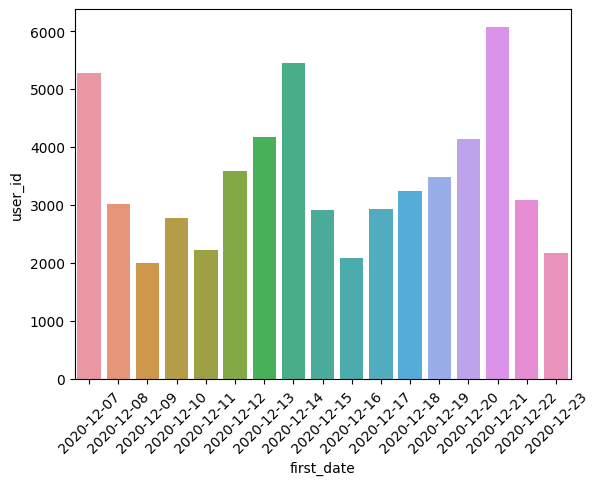

In [78]:
sns.barplot(data=registration_date, x='first_date', y='user_id')
plt.xticks(rotation=45)
plt.show()

 Existen 3 días peaks con registro de más de 5000 usuarios; el 07, 13 y 20 de Diciembre, quizá son días de fd semana, en donde hay mayor cantidad de visitas a la pág.

### Embudo de eventos

In [79]:
# Frecuencia de suceso de cada evento
ab_events['event_name'].value_counts()

login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: event_name, dtype: int64

In [80]:
# Frecuencia relativa de cada evento
ab_events['event_name'].value_counts(normalize=True)

login           0.430585
product_page    0.285213
purchase        0.142330
product_cart    0.141872
Name: event_name, dtype: float64

In [81]:
# Embudo simple; usuarios únicos por cada evento
users_count = ab_events.groupby('event_name').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False).reset_index()
users_count

,event_name,user_id
0,login,58696
1,product_page,38929
2,purchase,19568
3,product_cart,19284


Según la cantidad de usuarios por evento; algunos no siguen el orden establecido (login -> product_page -> product_card -> purchase), lo cual nos indica que es posible que la pág permita realizar la compra de un producto directamente sin necesidad de "añadirlo al carrito" previamente.

In [82]:
# Tasa de conversión respecto a la etapa anterior
users_count['conversion'] = users_count['user_id'].pct_change().fillna(0) + 1
users_count

,event_name,user_id,conversion
0,login,58696,1.000000
1,product_page,38929,0.663231
2,purchase,19568,0.502659
3,product_cart,19284,0.985487


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Si bien esto puede ayudar a ver la conversión en una etapa a otra sería bueno tambíen tener la conversión de cada evento respecto al evento de login, ya que esto ayuda a entender la conversión general del embudo y además, a estos valores también podrías ponerlos en una gráfica para que sea más fácil de entender el embudo que siguen los usuarios
</div>

In [83]:
# Porcentaje de usuarios que realiza su primer evento y concreta un pago
'{} usuarios concretan un pago, desde su primer evento'.format(
    (users_count.loc[2, 'user_id'] / users_count.loc[0, 'user_id'])
)

'0.3333787651628731 usuarios concretan un pago, desde su primer evento'

In [84]:
events = ab_events.pivot_table(
                            index='user_id',
                            columns='event_name',
                            values='event_dt',
                            aggfunc='min'
)
events

event_name,login,product_cart,product_page,purchase
user_id,,,,
0001710F4DDB1D1B,2020-12-14 20:20:40,2020-12-14 20:20:42,2020-12-14 20:20:41,NaT
000199F1887AE5E6,2020-12-14 09:56:09,2020-12-14 09:56:11,2020-12-14 09:56:09,2020-12-14 09:56:09
0002499E372175C7,2020-12-22 03:49:52,NaT,2020-12-22 03:49:55,2020-12-22 03:49:52
0002CE61FF2C4011,2020-12-07 04:37:36,2020-12-07 04:37:37,2020-12-07 04:37:42,NaT
000456437D0EFFE1,2020-12-15 11:25:03,NaT,2020-12-15 11:25:04,NaT
...,...,...,...,...
FFF7A7BAF44FE9B4,2020-12-19 11:10:03,NaT,NaT,NaT
FFF8FDBE2FE99C91,2020-12-20 04:53:50,NaT,2020-12-20 04:53:51,2020-12-20 04:53:50
FFF91B6C5431F375,2020-12-14 22:12:04,2020-12-14 22:12:04,NaT,NaT


In [85]:
# Etapas: login -> product_page -> product_cart -> purchase
step_1 = ~events['login'].isna()
step_2 = step_1 & (events['product_page'] > events['login'])
step_3 = step_2 & (events['product_cart'] > events['product_page'])
step_4 = step_3 & (events['purchase'] > events['product_cart'])

n_login = events[step_1].shape[0]
n_product_page = events[step_2].shape[0]
n_product_cart = events[step_3].shape[0]
n_purchase = events[step_4].shape[0]

In [86]:
print('Login:', n_login)
print('Product page:', n_product_page)
print('Product cart:', n_product_cart)
print('Purchases:', n_purchase)

Login: 58696
Product page: 22119
Product cart: 1347
Purchases: 6


Al comparar con el embudo simple, es posible notar que muchos usuarios no siguen la secuencia de eventos establecida (login -> product_page -> product_cart -> purchase) ya que de 19568 compras, sólo 6 finalizaron con el orden de iniciar sesión, visitar la pág de productos, luego añadir al carrito y finalizar la compra. Lo cual también se relaciona con la cantidad de usuarios que vimos por evento, pues en "compras" hay mayor cantidad de usuarios que en "añadir al carrito".

In [87]:
# Unión de los datos de las muestras con los eventos de los usuario
users_events = ab_participants.merge(ab_events, how='inner', on='user_id')

In [88]:
# Extraer sólo la fecha de la columna "event_dt"
users_events['event_date'] = users_events['event_dt'].dt.date
users_events.head()

,user_id,group,ab_test,event_dt,event_name,purchase,event_date
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,0.00,2020-12-07
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,0.00,2020-12-07
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,0.00,2020-12-07
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,0.00,2020-12-20


In [146]:
# Cantidad de usuarios por grupo
total_users = users_events.groupby('group', as_index=False).agg({'user_id':'nunique'})
total_users

,group,user_id
0,A,7874
1,B,6205


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, siempre hay que revisar las condiciones del experimento por cada grupo ya que un grupo que no esté en mismas condiciones no sería lo ideal para realizar la comparación
</div>

In [90]:
# El número de eventos por usuario está distribuido equitativamente entre las muestras?
events_by_user = users_events.groupby(['user_id', 'group'])['event_name'].count().reset_index(name='num_events')

# Comparar la distribución de eventos por usuario entre ambos grupos
events_by_user.groupby('group')['num_events'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,7874.0,7.45555,4.475159,1.0,4.0,6.0,9.0,40.0
B,6205.0,7.11249,4.246201,1.0,4.0,6.0,9.0,36.0


El grupo control tiene mayor cantidad de usuarios, sin embargo el promedio es similar, al igual que la desviación estándar de ambas muestras, y mantienen igual media; lo que sugiere que se distribuyen de manera equitativa.

In [91]:
# Comprobar que no existan usuarios presentes en ambas muestras
both_groups = ab_participants.groupby('user_id')['group'].nunique()
both_groups = both_groups[both_groups > 1]
both_groups.count()

441

Hay 441 usuarios que están en ambos grupos, lo que interferirá en los resultados del test A/B, por lo que se debe considerar en el análisis.

In [92]:
# Número de eventos por día
events_date = users_events.groupby('event_date', as_index=False).agg({'event_name':'count'})

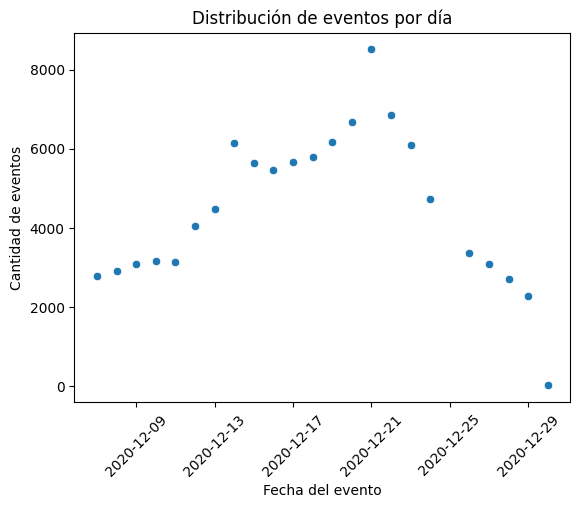

In [93]:
# Distribución de eventos por día
sns.scatterplot(data=events_date, x='event_date', y='event_name')
plt.xticks(rotation=45)
plt.xlabel('Fecha del evento')
plt.ylabel('Cantidad de eventos')
plt.title('Distribución de eventos por día')
plt.show()

Los días peaks en relación a la cantidad de eventos coinciden con los días en que se registró mayor cantidad de usuarios, también son días previos a la campaña "Christmas&New Year Promo" por lo que es posible que los usuarios estén más activos en la web esperando alguna promoción.  
Por otro lado, importante notar que la actividad de los usuarios disminuye considerablemente posterior al 25/Dic, lo cual puede relacionarse con el período de festividad.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto! La gráfica es clara para revisar cómo se distribuyen los datos a lo largo del tiempo, este tipo de análisis y gráficas ayuda a entender tendencias
</div>

In [98]:
events_by_user.head()

,user_id,group,num_events
0,0002CE61FF2C4011,A,12
1,001064FEAAB631A1,B,12
2,0010A1C096941592,A,12
3,001E72F50D1C48FA,B,6
4,002412F1EB3F6E38,A,6


### Peculiaridades en los datos

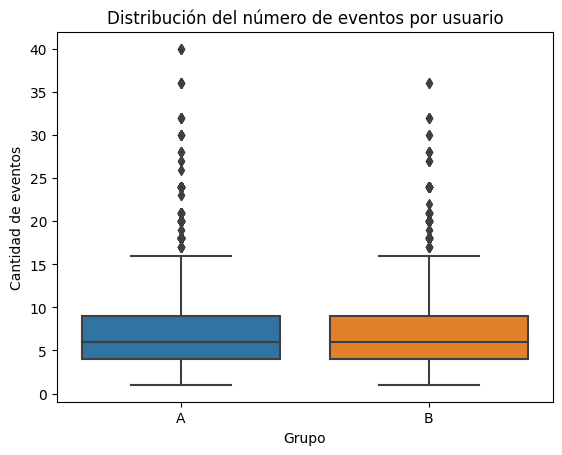

In [110]:
# Verificar outliers en el número de eventos por usuario
#events_by_user.boxplot(by='group')
sns.boxplot(data=events_by_user, x='group', y='num_events')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de eventos')
plt.title('Distribución del número de eventos por usuario')
plt.show()

Existen algunos usuarios que tienen una gran cantidad de eventos, es probable que sugiera usuarios que visitan frecuentemente la p+ag web, o sean clientes fidelizados.

## Test A/B

In [121]:
# Definir los eventos a evaluar en el embudo
funnel = users_events[users_events['event_name'].isin(['product_page', 'product_cart', 'purchase'])]

In [136]:
# Total de usuarios en cada grupo
total_users_a = ab_participants[ab_participants['group'] == 'A']['user_id'].nunique()
total_users_b = ab_participants[ab_participants['group'] == 'B']['user_id'].nunique()
print('Usuarios en el grupo A:', total_users_a)
print('Usuarios en el grupo B:', total_users_b)

Usuarios en el grupo A: 7874
Usuarios en el grupo B: 6205


In [140]:
# Cantidad de usuarios por evento, según grupo
events_users_a = (
    funnel[funnel['group'] == 'A']
    .groupby('event_name')
    .agg({'user_id':'nunique'})
    .sort_values(by='user_id', ascending=False)
)

In [141]:
events_users_a

,user_id
event_name,
product_page,5208
purchase,2682
product_cart,2483


En el grupo A se observa que existe mayor cantidad de usuarios con "compras" que con el evento de "añadir al carrito", lo cual sugiere que en el grupo control no necesariamente se sigue el orden de eventos que se pretende evaluar, y que probablemente sea posible comprar en la pág web sin la necidad de agregar el producto al carrito, como se había visto previamente.

In [138]:
events_users_b = (
    funnel[funnel['group'] == 'B']
    .groupby('event_name')
    .agg({'user_id':'nunique'})
    .sort_values(by='user_id', ascending=False)
)

In [151]:
events_users_b

,user_id
event_name,
product_page,3986
product_cart,2037
purchase,2008


En el caso del grupo B, la secuencia de eventos parece darse en el orden que se pretende evaluar; los usuarios suelen agregar un producto al carrito, previo a efectuar la compra. 

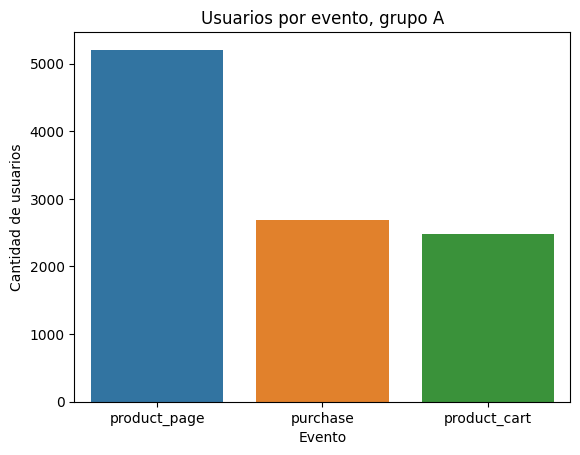

In [128]:
# Gráfico de la cantidad de usuarios en cada evento, del grupo A
sns.barplot(data= events_users_a, x='event_name', y='user_id')
plt.xlabel('Evento')
plt.ylabel('Cantidad de usuarios')
plt.title('Usuarios por evento, grupo A')
plt.show()

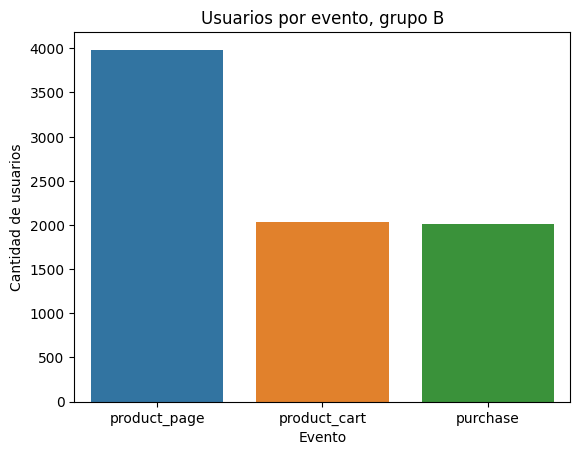

In [129]:
# Gráfico para la cantidad de usuarios en cada evento, del grupo B
sns.barplot(data= events_users_b, x='event_name', y='user_id')
plt.xlabel('Evento')
plt.ylabel('Cantidad de usuarios')
plt.title('Usuarios por evento, grupo B')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Estas gráficas por cada grupo son muy útiles para revisar la conversión entre cada grupo, cómo te menciono en un comentario anterior sería bueno también incluir en una gráfica más general también el evento de login ya que así se puede ver la diferencia en la conversión de las diferentes etapas
</div>

In [143]:
# Tasa de conversión en cada evento, para cada grupo
conversion_a = events_users_a / total_users_a
conversion_b = events_users_b / total_users_b

print('Grupo A:', conversion_a)
print()
print('Grupo B:', conversion_b)

Grupo A:                user_id
event_name            
product_page  0.661417
purchase      0.340615
product_cart  0.315342

Grupo B:                user_id
event_name            
product_page  0.642385
product_cart  0.328284
purchase      0.323610


Se esperaba que en cada etapa del embudo: *product_page → product_card → purchase*, hubiera al menos un 10% de aumento en la conversión, sin embargo, al ver la conversión que cada grupo tuvo en las distintas etapas del embudo; no se refleja un aumento en la conversión para el grupo B en ninguno de los eventos.

### Prueba Z

In [144]:
# Función para comprobar la diferencia estadística entre las proporciones de los grupos para cada evento
def hypothesis_check(successes1, successes2, trials1, trials2, alpha=0.01):
    
    # Proporción de éxito en el primer evento
    p1 = successes1 / trials1
    
    # Proporción de éxito en el segundo evento
    p2 = successes2 / trials2
    
    # Proporción de éxito en el dataset unido
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    
    # Diferencia entre las proporciones en los datasets
    difference = p1 - p2
    
    # Calcular el estadístico en desviaciones estandar de la distribución normal
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    
    # Establecer distribución normal estandar
    distr = st.norm(0, 1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('P value:', p_value)
    
    if p_value < alpha:
        print('Rechazar la hipótesis nula; hay una diferencia significativa entre las proporciones de ambos grupos')
    else:
        print('No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes')

In [162]:
# Comprobar la proporción entre ambos grupos para el evento "product page"
print('Diferencia estadística entre ambos grupos para el evento "product page"')
print()
hypothesis_check(events_users_a.loc['product_page'], 
                events_users_b.loc['product_page'],
                total_users_a,
                total_users_b)

Diferencia estadística entre ambos grupos para el evento "product page"

P value: [0.01850463]
No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes


In [163]:
# Comprobar la proporción entre ambos grupos para el evento "product cart"
print('Diferencia estadística entre ambos grupos para el evento "product cart"')
print()
hypothesis_check(events_users_a.loc['product_cart'], 
                events_users_b.loc['product_cart'],
                total_users_a,
                total_users_b)

Diferencia estadística entre ambos grupos para el evento "product cart"

P value: [0.10247323]
No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes


In [164]:
# Comprobar la proporción entre ambos grupos para el evento "purchase"
print('Diferencia estadística entre ambos grupos para el evento "purchase"')
print()
hypothesis_check(events_users_a.loc['purchase'], 
                events_users_b.loc['purchase'],
                total_users_a,
                total_users_b)

Diferencia estadística entre ambos grupos para el evento "purchase"

P value: [0.03355878]
No se puede rechazar la hipótesis nula; no hay razón para pensar que las proporciones entre ambos grupos son diferentes


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien aplicada la prueba de hipótesis! Revisar por cada parte del embudo que siguen los usuarios es importante para determinar si hay diferencias significativas en algún punto y entender donde se está cambiando la experiencia de usuario
</div>

## Conclusiones

En el análisis exploratorio se identificó las campañas de marketing que se desarrollaron en la fecha correspondientes a los datos en que tuvo desarrollo el test A/B.  

- Se observaron además 3 días con un peak en los registros de usuarios, donde los últimos 2 peaks se relacionan con las fechas en donde se genera una mayor actividad en la pág web por parte de los usuarios, esto además coincide con fecha cercana a la campaña de navidad por lo cual ese aumento en los eventos puede relacionarse a la espera de novedades/ofertas y/o compras.
- También al ver el embudo simple de los eventos, se encontró que hay mayor cantidad del evento "compras" que de "añadir al carrito", por lo que es posible que la pág web permita comprar el producto directamente desde la pag de productos, sin la necesidad de agregarlos previamente.  

Por otro lado, se encontraron 441 usuarios que participaron en ambas muestras del test A/B, lo cual interfiere en la validez de la prueba.

Se observaron también valores atípicos para la cantidad de eventos por usuario, lo cual puede relacionarse con clientes fidelizados que tienen mayor actividad en la pág web, o a que algunos usuarios han frecuentado más por la campaña de marketing de Diciembre y las festividades de la época.

En cuanto a los resultados de la prueba; no había diferencia estadística entre las proporciones de ambos grupos, lo cual le da  fiabilidad a los resultados, sin embargo habían usuarios presentes en ambos grupos y esto disminuye la validez de los mismos.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un excelente trabajo Macarena, redactaste muy buenas conclusiones. Se nota tu conocimiento para realizar los análisis a partir de pruebas AB, esto será algo que encuentres muy seguido en un entorno laboral.
    
Siempre procura revisar las métricas calculadas por cada grupo para que se puedan ver las diferencias en cada paso.
    
Saludos.
</div>